# Data Sciences and GIS for Mobility

## Lecture 5 - Classification

So, it's time to learn about Classification models. This notebook will run you through the essential concepts, and give examples on how to run multiple Classification algorithms.


As always, let's do some imports. 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

-----

## Part 1 - Logistic Regression

_The first model of the lecture relates with Logistic Regression. It is important that you understand the mechanics well, because their are applicable in other types of Classification models_

We want you to understand the intuition behind the logit function, so let's work on the basics. Imagine you want to make a function that determines the probability of some event (let's call it x). The "event" x could simply mean that "the input data corresponds to class 1" (in which case, ~x means "the input data corresponds to class 0"). 

So, to plot such a function, let's just create a vector with values between 0 and 1

In [66]:
px=np.arange(0.0001, 1, 0.001)

So, now we determine the odds ratio function

In [67]:
y=px/(1-px)

...and plot it

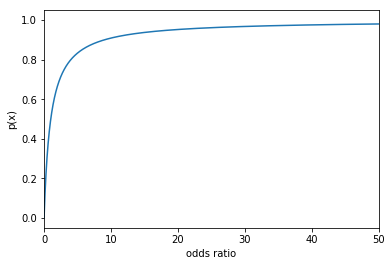

In [68]:
plt.plot(y,px)
plt.xlim([0,50])
plt.xlabel("odds ratio")
plt.ylabel("p(x)");

As said in the class, this function form is not ideal at all. What happens if we apply the log?

In [69]:
y=np.log(px/(1-px))

It will be clear with in plot

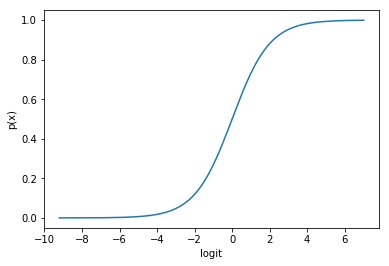

In [70]:
plt.plot(y,px)
#plt.xlim([0,50])
plt.xlabel("logit")
plt.ylabel("p(x)");

ok, now it seems much more balanced, doesn't it? 

Understanding this function is important:
- What is the probability of x (p(x)) when the log odds ratio is 0? 

- What is the odds ratio itself? 

- What about the extremes (when is it 1 and when is it 0?)?

------

Let's start playing with data. First we need to load:

In [71]:
f=pd.read_csv("NYC_taxis_weather_2016_with_dummies.csv")

Take a look at the dataframe yourself

In [72]:
f

,datetime,pickups1,pickups17_lag1,pickups17_lag2,pickups1_lag1,pickups1_lag2,pickups21_lag1,pickups21_lag2,pickups28_lag1,pickups28_lag2,...,fog,rain_drizzle,time_of_day_afternoon,time_of_day_afternoon rush,time_of_day_evening,time_of_day_lunch time,time_of_day_morning,time_of_day_morning rush,time_of_day_night,is_weekend
0,2016-01-01 00:00:00,162,202.0,307.0,109.0,171.0,198.0,306.0,40.0,54.0,...,0,0,0,0,0,0,0,0,1,False
1,2016-01-01 00:15:00,251,394.0,202.0,162.0,109.0,312.0,198.0,29.0,40.0,...,0,0,0,0,0,0,0,0,1,False
2,2016-01-01 00:30:00,310,420.0,394.0,251.0,162.0,699.0,312.0,16.0,29.0,...,0,0,0,0,0,0,0,0,1,False
3,2016-01-01 00:45:00,338,310.0,420.0,310.0,251.0,482.0,699.0,3.0,16.0,...,0,0,0,0,0,0,0,0,1,False
4,2016-01-01 01:00:00,369,403.0,310.0,338.0,310.0,459.0,482.0,2.0,3.0,...,0,0,0,0,0,0,0,0,1,False
5,2016-01-01 01:15:00,319,398.0,403.0,369.0,338.0,495.0,459.0,0.0,2.0,...,0,0,0,0,0,0,0,0,1,False
6,2016-01-01 01:30:00,314,353.0,398.0,319.0,369.0,535.0,495.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,False
7,2016-01-01 01:45:00,328,304.0,353.0,314.0,319.0,438.0,535.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,False
8,2016-01-01 02:00:00,346,320.0,304.0,328.0,314.0,449.0,438.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,False
9,2016-01-01 02:15:00,297,356.0,320.0,346.0,328.0,423.0,449.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,False


Yes, the index is no longer the time, let's put it back

In [73]:
f.set_index("datetime")

,pickups1,pickups17_lag1,pickups17_lag2,pickups1_lag1,pickups1_lag2,pickups21_lag1,pickups21_lag2,pickups28_lag1,pickups28_lag2,temp,...,fog,rain_drizzle,time_of_day_afternoon,time_of_day_afternoon rush,time_of_day_evening,time_of_day_lunch time,time_of_day_morning,time_of_day_morning rush,time_of_day_night,is_weekend
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,162,202.0,307.0,109.0,171.0,198.0,306.0,40.0,54.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 00:15:00,251,394.0,202.0,162.0,109.0,312.0,198.0,29.0,40.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 00:30:00,310,420.0,394.0,251.0,162.0,699.0,312.0,16.0,29.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 00:45:00,338,310.0,420.0,310.0,251.0,482.0,699.0,3.0,16.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 01:00:00,369,403.0,310.0,338.0,310.0,459.0,482.0,2.0,3.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 01:15:00,319,398.0,403.0,369.0,338.0,495.0,459.0,0.0,2.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 01:30:00,314,353.0,398.0,319.0,369.0,535.0,495.0,2.0,0.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 01:45:00,328,304.0,353.0,314.0,319.0,438.0,535.0,1.0,2.0,40.4,...,0,0,0,0,0,0,0,0,1,False
2016-01-01 02:00:00,346,320.0,304.0,328.0,314.0,449.0,438.0,1.0,1.0,40.4,...,0,0,0,0,0,0,0,0,1,False


So, imagine that you are an NYC taxi fleet manager. At each 15 minutes, you goal is to make sure your company has enough cars for very big spikes in demand across the city (like above 90 percentile). If you detect some very big spike in a specific area, you coordinate with the cars in the neighbourhood to go there. 

For this exercise, let's assume that area 1 is the only truly important for you. Doing this manually would be very tiring (if at all possible), so you rely on your Data Science skills to get a model that does it for you:

**At each 15 minutes time interval, predict whether the next time interval will have a demand spike ("stress").**

Let's first find the actual value above which you call it a "stress" situation:

In [74]:
stress_threshold=np.percentile(f['pickups1'], 90)

How many demand pickups does it correspond to percentile 90? And other percentiles?  

In [75]:
len(f[f.pickups1>stress_threshold])

1748

In [76]:
len(f[f.pickups1>50])

14839

Now, let's create a new column (or variable) that is True when it is a "stress" scenario, and False when it is not

In [77]:
f['stress']=f['pickups1'].apply(lambda x: x>stress_threshold)

Do what to inspect this new data that you created? (e.g. use describe(), hist(), etc...)

In [78]:
f.describe()

,pickups1,pickups17_lag1,pickups17_lag2,pickups1_lag1,pickups1_lag2,pickups21_lag1,pickups21_lag2,pickups28_lag1,pickups28_lag2,temp,prcp,fog,rain_drizzle,time_of_day_afternoon,time_of_day_afternoon rush,time_of_day_evening,time_of_day_lunch time,time_of_day_morning,time_of_day_morning rush,time_of_day_night
count,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.00000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000
mean,197.917182,397.725103,397.708620,197.910256,197.904247,276.813301,276.818910,98.999828,98.995536,51.15000,0.099780,0.049451,0.274725,0.125000,0.125000,0.125000,0.083333,0.166667,0.041667,0.333333
std,105.638241,210.816058,210.811892,105.640104,105.638648,162.654386,162.653703,74.249825,74.250259,15.59174,0.259555,0.216813,0.446389,0.330728,0.330728,0.330728,0.276393,0.372689,0.199832,0.471418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.90000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,223.000000,223.000000,100.000000,100.000000,103.000000,103.000000,10.000000,10.000000,39.10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,223.000000,418.000000,418.000000,223.000000,223.000000,331.000000,331.000000,109.000000,109.000000,51.35000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,278.000000,529.000000,529.000000,278.000000,278.000000,397.000000,397.000000,160.000000,160.000000,63.40000,0.050000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,462.000000,1026.000000,1026.000000,462.000000,462.000000,814.000000,814.000000,323.000000,323.000000,79.60000,1.820000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's now create our model. The first thing to do is to import the sklearn package that has Logistic Regression, and then just create the respective object.

In [79]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()

We have a model, but it is "empty", so let's create the training and test sets now. 

We will create the model with 2/3 of the data (training set), and then 1/3 of the data is kept aside for later validation (test set).

In [80]:
split=int(len(f)*2.0/3)
training=f[:split]
test=f[split:]

We need to create the x and y for the training and test set now. Notice that the y is the "target" variable, i.e. our "stress" column, and the x comes from **almost** all other columns. Let's check all columns

In [81]:
training.columns

Index(['datetime', 'pickups1', 'pickups17_lag1', 'pickups17_lag2',
       'pickups1_lag1', 'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2',
       'pickups28_lag1', 'pickups28_lag2', 'temp', 'prcp', 'fog',
       'rain_drizzle', 'time_of_day_afternoon', 'time_of_day_afternoon rush',
       'time_of_day_evening', 'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush', 'time_of_day_night', 'is_weekend',
       'stress'],
      dtype='object')

Ok, we need to create the x using EVERYTHING but the 'stress' variable, but also we need to remove "pickups1" (**why?**)

In [82]:
x_train=training[['pickups17_lag1', 'pickups17_lag2', 'pickups1_lag1',
       'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2', 'pickups28_lag1',
       'pickups28_lag2',  'temp', 'prcp','fog', 'rain_drizzle', 'is_weekend', 'time_of_day_afternoon',
       'time_of_day_afternoon rush', 'time_of_day_evening',
       'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush', 'time_of_day_night']]
x_test=test[['pickups17_lag1', 'pickups17_lag2', 'pickups1_lag1',
       'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2', 'pickups28_lag1',
       'pickups28_lag2',  'temp', 'prcp','fog', 'rain_drizzle', 'is_weekend', 'time_of_day_afternoon',
       'time_of_day_afternoon rush', 'time_of_day_evening',
       'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush', 'time_of_day_night']]

To make sure you understand things, don't forget to ALWAYS play with the code here... For example, what's the content of the new lists x_train and x_test?

In [83]:
x_train[:5].T

,0,1,2,3,4
pickups17_lag1,202,394,420,310,403
pickups17_lag2,307,202,394,420,310
pickups1_lag1,109,162,251,310,338
pickups1_lag2,171,109,162,251,310
pickups21_lag1,198,312,699,482,459
pickups21_lag2,306,198,312,699,482
pickups28_lag1,40,29,16,3,2
pickups28_lag2,54,40,29,16,3
temp,40.4,40.4,40.4,40.4,40.4
prcp,0.03,0.03,0.03,0.03,0.03


In [84]:
x_test[:5].T

,11648,11649,11650,11651,11652
pickups17_lag1,144,160,173,183,197
pickups17_lag2,132,144,160,173,183
pickups1_lag1,73,68,65,82,67
pickups1_lag2,50,73,68,65,82
pickups21_lag1,123,160,162,176,231
pickups21_lag2,98,123,160,162,176
pickups28_lag1,12,35,22,33,81
pickups28_lag2,8,12,35,22,33
temp,49,49,49,49,49
prcp,0,0,0,0,0


...and now the ys are trivial

In [85]:
y_train=training['stress']

y_test=test['stress']

To make sure you understood, do you want to see what's inside these two vectors?

In [86]:
y_train[:5]

0    False
1    False
2    False
3     True
4     True
Name: stress, dtype: bool

Ok, we have our Xs and Ys! Ready to go... it's totally trivial with sklearn:

In [87]:
LogReg.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Congrats! You trained your first Logistic Regression model. What's its accuracy (**on the test set**)?

In [88]:
LogReg.score(x_test,y_test)

0.951407967032967

Do you want to try it on the training set? What do you expect?

In [89]:
LogReg.score(x_train, y_train)

0.9553571428571429

If the values tend to be similar, then congrats, it's very likely that your model is not overfitting! :-)



Anyway, accuracy is not everything in a classifier. Another VERY interesting concept is the confusion matrix

In [90]:
from sklearn.metrics import confusion_matrix

To use it properly, let's first obain the predictions of our model using the test set:

In [91]:
ypred=LogReg.predict(x_test)

Now, we can compare the predictions with the observations, using the confusion matrix

In [92]:
confusion_matrix(y_test, ypred)

array([[5125,  111],
       [ 172,  416]])

...we hope you're not confused!  ;-)

A last useful thing about Logistic Regression. It is a parametric model, so its parameters beta (its "coefficients") can actually mean something. Let's take a look at them:

In [93]:
LogReg.coef_

array([[ 1.32249896e-03, -2.06854397e-03,  3.93506684e-02,
         1.03941516e-02,  9.13059398e-04, -2.28645372e-04,
        -3.43903226e-04, -3.50035942e-03, -3.54933044e-03,
        -9.32509485e-02, -5.92035751e-01,  4.17788437e-02,
        -6.33514551e-01, -2.96667928e+00, -8.76610931e-01,
        -1.59409023e+00, -2.30810853e+00, -2.42899060e+00,
        -1.17107044e+00, -2.44155481e+00]])

This is a bit confusing. Which coefficient correspond to which variable? Let's make it more interpretable:

In [94]:
for cname, val in zip(x_train.columns, LogReg.coef_.tolist()[0]):
    print("%s=%.3f"%(cname, val))

pickups17_lag1=0.001
pickups17_lag2=-0.002
pickups1_lag1=0.039
pickups1_lag2=0.010
pickups21_lag1=0.001
pickups21_lag2=-0.000
pickups28_lag1=-0.000
pickups28_lag2=-0.004
temp=-0.004
prcp=-0.093
fog=-0.592
rain_drizzle=0.042
is_weekend=-0.634
time_of_day_afternoon=-2.967
time_of_day_afternoon rush=-0.877
time_of_day_evening=-1.594
time_of_day_lunch time=-2.308
time_of_day_morning=-2.429
time_of_day_morning rush=-1.171
time_of_day_night=-2.442


What do you think of the results? Take a look at the signs. Do they make sense? Try to play with the stress_threshold above (instead of 90 percentile, you can try others...)

------

## Part 2 - Support Vector Machines

See chapter 12 of [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

In Part 1, we did almost everything for you. But now, we'll just help you with the import:

In [95]:
from sklearn.svm import SVC

Create the object

In [96]:
sv=SVC()

Train the model

In [97]:
sv.fit(x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Check its accuracy

In [98]:
sv.score(x_test, y_test)

0.8990384615384616

Check its confusion matrix

In [99]:
ypred=sv.predict(x_test)
confusion_matrix(y_test, ypred)

array([[5236,    0],
       [ 588,    0]])

Be critical about it... is it working at all? Before you try playing with the parameters, think about how the model works: it relies HEAVILY on comparing pairs of vectors...

...so when their data is somewhat odd (for example having numeric variables, dummies, variables with different ranges), you need to make sure you get everything comparable. For example, you need to make sure every variable falls in the same range or scale.

Do you want to try?

In [107]:
x_train_standard=(x_train-x_train.mean())/x_train.std()
x_test_standard=(x_test-x_test.mean())/x_test.std()

In [108]:
sv.fit(x_train_standard,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [109]:
sv.score(x_test_standard, y_test)

0.9443681318681318

In [110]:
ypred_standard=sv.predict(x_test_standard)
confusion_matrix(y_test, ypred_standard)

array([[5119,  117],
       [ 207,  381]])

----

## Part 3 - Decision Trees

See chapter 9.2 of [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

Here is the Decision Tree object import:

In [100]:
from sklearn.tree import DecisionTreeClassifier

Create the object

In [101]:
dt=DecisionTreeClassifier()

Train the model

In [102]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Check accuracy

In [103]:
dt.score(x_test,y_test)

0.9256524725274725

Check confusion matrix

In [104]:
ypred=dt.predict(x_test)
confusion_matrix(y_test, ypred)

array([[4981,  255],
       [ 178,  410]])

Now, try a random forest. Can you find where it is in sklearn?

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))




0.9428228021978022


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
